# User Churn Prediction

In this project, we analyze data from a telecom company. The purpose is to use supervised learning models to identify customers who are likely to stop using service in the future. Furthermore, top factors that influence user retention will be identified.

## Contents

<ul>
<li>[Part 1: Data Exploration](#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Selection](#Part-4:-Feature-Selection)
<li>[Part 5: Use Probabilities as Prediction Results](#Part-5:-Use-Probabilities-as-Prediction-Results)
</ul>

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [929]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('../data/churn.all')

In [930]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [931]:
print "Num of rows: " + str(churn_df.shape[0]) # row count
print "Num of columns: " + str(churn_df.shape[1]) # col count

Num of rows: 5000
Num of columns: 21


### Part 1.2: Data cleaning

Remove Extra Whitespace

In [932]:
churn_df['voice_mail_plan'][0]

' yes'

In [933]:
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].map(lambda x: x.strip())
churn_df['intl_plan'] = churn_df['intl_plan'].map(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].map(lambda x: x.strip())

### Part 1.3:  Understand the features

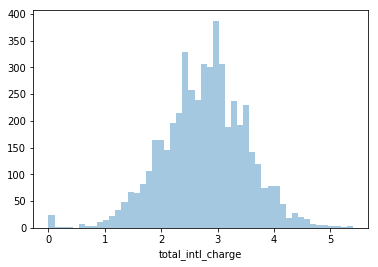

In [934]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(churn_df['total_intl_charge'], kde=False)

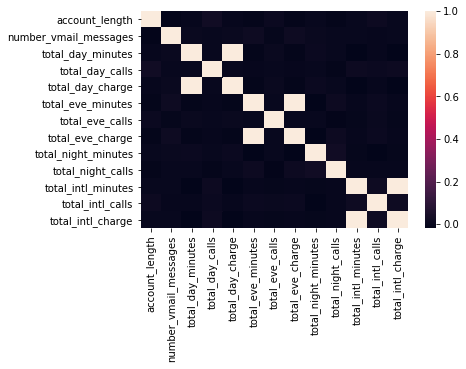

In [935]:
corr = churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

sb.heatmap(corr)

In [936]:
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.001291,0.014277,0.001292
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.002463,0.000124,0.002505
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,-0.019486,-0.001303,-0.019415
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.013097,0.010893,0.013161
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,-0.019490,-0.001307,-0.019419
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,0.000137,0.008388,0.000159
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,-0.007458,0.005574,-0.007507
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,0.000132,0.008393,0.000155
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,-0.006721,-0.017214,-0.006655
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.000391,-0.000156,0.000368


In [937]:
from scipy.stats import pearsonr
print pearsonr(churn_df['total_day_minutes'], churn_df['number_vmail_messages'])[0]

0.005381375960654535


# Part 2: Feature Preprocessing

In [938]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [939]:
# Get ground truth data
y = np.where(churn_df['churned'] == 'True.',1,0)

# Drop some useless columns
to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Converts data frame to its Numpy-array representation.
X_without_state = churn_feat_space.as_matrix().astype(np.float)

In [940]:
#add 'state' back to 'churn_feat_space'
churn_feat_space["state"] = churn_df["state"].astype('category')
#convert 'state' to dummy/indicator variables
churn_feat_space = pd.get_dummies(churn_feat_space, columns = ["state"])
#print the head of converted dataframe 'churn_feat_space'
churn_feat_space.head()

# Converts data frame to its Numpy-array representation.
X = churn_feat_space.as_matrix().astype(np.float)

In [941]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 5000 observations and 68 features
Unique target labels: [0 1]


# Part 3: Model Training and Result Evaluation

### Part 3.1: K-fold Cross-Validation

In [942]:
from sklearn.cross_validation import KFold

#This program does 5-fold. It saves the result at each time as different parts of y_pred. 
#In the end, it returns the y_pred as the result of all the five 5-fold.
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

### Part 3.2: Run Supervised Learning Models and Calculate Accuracy

In [943]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

In [944]:
#Compare the result
LR_CV_result = run_cv(X,y,LogisticRegression)
RF_CV_result = run_cv(X,y,RandomForestClassifier)
KNN_CV_result = run_cv(X,y,KNeighborsClassifier) #Default: n_neighbors=5

In [945]:
print "Logistic Regression (L2 is default) " + str(accuracy(y, LR_CV_result))
print "Random forest: " + str(accuracy(y, RF_CV_result))
print "K-nearest-neighbors:" + str(accuracy(y, KNN_CV_result))

Logistic Regression (L2 is default) 0.8664
Random forest: 0.933
K-nearest-neighbors:0.8618


In [946]:
from sklearn.svm import SVC
SVM_CV_result= run_cv(X,y,SVC)
print "SVM: " + str(accuracy(y, SVM_CV_result))

#Show the details of SVM prediction results
churn_df_SVM_CV = churn_df
churn_df_SVM_CV['SVM_Predicted_churned'] = SVM_CV_result == 1
churn_df_SVM_CV[churn_df_SVM_CV.columns[-2:]].head(10)

SVM: 0.878


,churned,SVM_Predicted_churned
0,False.,False
1,False.,False
2,False.,False
3,False.,False
4,False.,False
5,False.,False
6,False.,False
7,False.,False
8,False.,False
9,False.,False


In [947]:
#Show the details of prediction results
churn_df_LR_CV = churn_df
churn_df_LR_CV['LR_Predicted_churned'] = LR_CV_result == 1
churn_df_LR_CV[churn_df_LR_CV.columns[-2:]].head(10)

,SVM_Predicted_churned,LR_Predicted_churned
0,False,False
1,False,False
2,False,False
3,False,True
4,False,True
5,False,False
6,False,False
7,False,False
8,False,False
9,False,True


### (Optional) Part 3.3: Use Grid Search to Find Optimal Parameters

#### Part 3.3.1: Find Optimal Parameters - LogisticRegression

In [948]:
def print_grid_search_metrics(gs):
    print "Best score: %0.3f" % gs.best_score_
    print "Best parameters set:" 
#     print gs.best_params_
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [949]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5, verbose=1, refit=False)
Grid_LR.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=False, scoring=None, verbose=1)

In [950]:
print_grid_search_metrics(Grid_LR)

Best score: 0.864
Best parameters set:
	C: 10
	penalty: 'l1'


In [951]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(LogisticRegression(C=1,penalty='l1'), X, y, cv=5)
print "Logistic Regression 5-fold cross validation accuracy: " + str(np.mean(score))

Logistic Regression 5-fold cross validation accuracy: 0.8641996901996901


#### Part 3.3.2: Find Optimal Parameters: KNN

In [952]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5, verbose=1, refit=False)
Grid_KNN.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=False, scoring=None, verbose=1)

In [953]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.865
Best parameters set:
	n_neighbors: 5


In [954]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=5),X,y,cv=5)
print "5-fold cross validation accuracy: " + str(np.mean(score))

5-fold cross validation accuracy: 0.8650008918008918


#### Part 3.3.3: Find Optimal Parameters: SVM

In [955]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters = {'C': Cs, 'gamma' : gammas}
Grid_SVM = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5)
Grid_SVM.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [956]:
print_grid_search_metrics(Grid_SVM)

Best score: 0.902
Best parameters set:
	C: 10
	gamma: 0.01


### Part 3.4: Calculate Confusion Matrix (Precision, Recall, Accuracy)

In [957]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Precision is " + str(precision)
    print "Recall is " + str(recall)

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

[0 1]
Random Forest
Accuracy is 0.933
Precision is 0.9151785714285714
Recall is 0.57991513437058


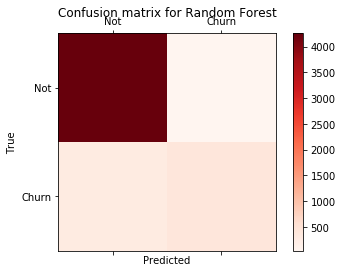

K-Nearest-Neighbors
Accuracy is 0.8618
Precision is 0.58
Recall is 0.08203677510608204


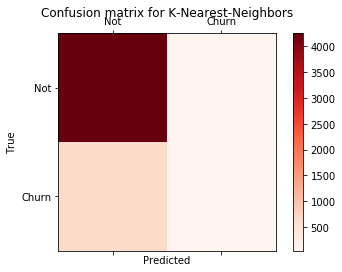

Logisitic Regression
Accuracy is 0.8664
Precision is 0.5679442508710801
Recall is 0.23055162659123055


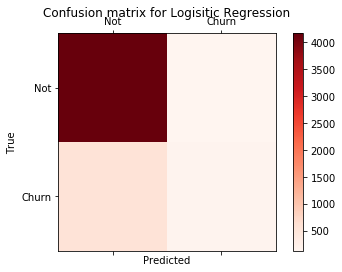

In [958]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print class_names

confusion_matrices = [
    ("Random Forest", confusion_matrix(y,RF_CV_result)),
    ("K-Nearest-Neighbors", confusion_matrix(y,KNN_CV_result)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result))
]

draw_confusion_matrices(confusion_matrices,class_names)

In this project, Random forest model yielded the highest accuracy, precision and recall, hence it should be selected for prediction. 
K-Nearest-Neighbors and Logistic Regression models showed very similar accuracy and precision with slightly better performence of K-Nearest-Neighbors. However, the recall of K-Nearest-Neighbors is significantly lower than Logistic Regression model. 
Recall is a matric which indicates the ability of a model to find all the relevant cases within a dataset. In this project, the recall of a model is more important than its precision. As a conclusion, K-Nearest-Neighbors perfermed worse than Logistic Regression model.

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

#### Part 4.1.1 - Compare Feature Coefficients

In [959]:
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print "Logistic Regression (L1) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat_space.columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

# churn_feat_space.columns

Logistic Regression (L1) Coefficients
voice_mail_plan: -0.8707
number_customer_service_calls: 0.6877
intl_plan: 0.6469
total_day_charge: 0.4241
number_vmail_messages: 0.4001
total_day_minutes: 0.3218
total_eve_charge: 0.2322
state_VA: -0.1948
total_intl_minutes: 0.1747
total_intl_calls: -0.1669
state_RI: -0.1568
total_night_minutes: 0.1511
state_MT: 0.14
total_eve_minutes: 0.1395
state_CA: 0.1189
state_HI: -0.1188
state_WA: 0.1119
state_IL: -0.1059
state_VT: -0.1035
state_WY: -0.0961
state_NJ: 0.0941
state_TX: 0.0892
state_NE: -0.0832
state_WI: -0.0817
state_AK: -0.0747
total_intl_charge: 0.071
state_SC: 0.0695
account_length: 0.0609
total_night_charge: 0.0588
total_day_calls: 0.0583
state_ND: -0.052
state_CO: -0.0514
state_ME: 0.051
state_MI: 0.0504
state_NY: 0.0481
state_MA: 0.047
state_AL: -0.0468
total_night_calls: -0.0417
state_NC: -0.0405
state_GA: -0.0386
state_MN: 0.0382
state_AR: 0.0354
state_NV: 0.0335
state_PA: -0.0314
state_KY: 0.0311
state_CT: 0.0309
state_NM: -0.027
total

In [960]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print "Logistic Regression (L2) Coefficients"
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      churn_feat_space.columns), key=lambda (k,v):(-abs(k),v)):
    print v + ": " + str(k)

Logistic Regression (L2) Coefficients
voice_mail_plan: -0.8981
number_customer_service_calls: 0.6885
intl_plan: 0.6479
number_vmail_messages: 0.4276
total_day_minutes: 0.3777
total_day_charge: 0.3694
state_VA: -0.1923
total_eve_charge: 0.1871
total_eve_minutes: 0.1869
total_intl_calls: -0.1687
state_RI: -0.1544
state_MT: 0.147
total_intl_charge: 0.1281
state_CA: 0.1242
total_intl_minutes: 0.1193
state_WA: 0.1185
state_HI: -0.1168
total_night_minutes: 0.11
state_IL: -0.1036
total_night_charge: 0.1021
state_NJ: 0.1012
state_VT: -0.1008
state_TX: 0.0966
state_WY: -0.0926
state_NE: -0.0809
state_WI: -0.0787
state_SC: 0.0764
state_AK: -0.073
account_length: 0.063
total_day_calls: 0.0608
state_ME: 0.0584
state_MI: 0.0579
state_NY: 0.0559
state_MA: 0.0547
state_ND: -0.0492
state_CO: -0.0484
state_MN: 0.0463
total_night_calls: -0.0438
state_AL: -0.0427
state_AR: 0.0427
state_NV: 0.0402
state_KY: 0.0385
state_CT: 0.038
state_NC: -0.0376
state_GA: -0.0357
state_WV: 0.0305
state_UT: 0.0292
state_

#### Part 4.1.2 - Use Recursive Feature Elimination (RFE)

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [961]:
from sklearn.feature_selection import RFE

rfe_l1 = RFE(LRmodel_l1, n_features_to_select=1) # If None, half of the features are selected.
rfe_l1.fit(X, y)
print "Logistic Regression (L1) RFE Result"
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l1.ranking_), churn_feat_space.columns)):
    print v + ": " + str(k)

Logistic Regression (L1) RFE Result
total_day_charge: 1.0
number_customer_service_calls: 2.0
intl_plan: 3.0
voice_mail_plan: 4.0
number_vmail_messages: 5.0
total_eve_charge: 6.0
total_intl_charge: 7.0
total_night_minutes: 8.0
state_VA: 9.0
total_intl_calls: 10.0
state_RI: 11.0
state_MT: 12.0
state_HI: 13.0
state_CA: 14.0
state_VT: 15.0
state_IL: 16.0
state_WY: 17.0
state_WA: 18.0
state_WI: 19.0
state_NE: 20.0
total_day_minutes: 21.0
state_NJ: 22.0
state_AK: 23.0
state_TX: 24.0
state_SC: 25.0
account_length: 26.0
state_ND: 27.0
state_CO: 28.0
state_AL: 29.0
state_NC: 30.0
total_day_calls: 31.0
total_eve_minutes: 32.0
state_GA: 33.0
state_PA: 34.0
total_night_calls: 35.0
state_MI: 36.0
state_ME: 37.0
total_intl_minutes: 38.0
total_night_charge: 39.0
state_MA: 40.0
state_NY: 41.0
state_MN: 42.0
state_AR: 43.0
state_NV: 44.0
state_KY: 45.0
state_CT: 46.0
total_eve_calls: 47.0
state_WV: 48.0
state_OK: 49.0
state_UT: 50.0
state_MD: 51.0
state_MS: 52.0
state_OR: 53.0
state_KS: 54.0
state_TN: 

In [962]:
from sklearn.feature_selection import RFE
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1) # If None, half of the features are selected.
rfe_l2.fit(X, y)
print "Logistic Regression (L2) RFE Result"
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), churn_feat_space.columns)):
    print v + ": " + str(k)

Logistic Regression (L2) RFE Result
total_day_minutes: 1.0
number_customer_service_calls: 2.0
intl_plan: 3.0
voice_mail_plan: 4.0
number_vmail_messages: 5.0
total_day_charge: 6.0
total_eve_charge: 7.0
total_intl_charge: 8.0
total_night_minutes: 9.0
state_VA: 10.0
total_eve_minutes: 11.0
total_intl_calls: 12.0
state_RI: 13.0
state_MT: 14.0
state_HI: 15.0
total_intl_minutes: 16.0
state_VT: 17.0
state_IL: 18.0
state_CA: 19.0
state_WY: 20.0
total_night_charge: 21.0
state_WA: 22.0
state_WI: 23.0
state_NE: 24.0
state_AK: 25.0
state_NJ: 26.0
state_TX: 27.0
state_ND: 28.0
state_AL: 29.0
state_CO: 30.0
account_length: 31.0
state_SC: 32.0
state_NC: 33.0
total_day_calls: 34.0
state_GA: 35.0
total_night_calls: 36.0
state_MI: 37.0
state_ME: 38.0
state_MA: 39.0
state_NY: 40.0
state_MN: 41.0
state_AR: 42.0
state_NV: 43.0
state_KY: 44.0
state_CT: 45.0
state_WV: 46.0
state_UT: 47.0
state_OK: 48.0
state_MD: 49.0
state_MS: 50.0
state_OR: 51.0
total_eve_calls: 52.0
state_KS: 53.0
state_TN: 54.0
state_PA: 

### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [963]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.138
total_day_charge: 0.1352
number_customer_service_calls: 0.0991
intl_plan: 0.0704
total_eve_minutes: 0.0635
total_eve_charge: 0.056
total_intl_charge: 0.0518
total_intl_calls: 0.0434
total_night_charge: 0.0408
total_intl_minutes: 0.039
total_night_minutes: 0.0355
account_length: 0.0347
total_eve_calls: 0.0285
total_day_calls: 0.0282
total_night_calls: 0.028
number_vmail_messages: 0.0217
voice_mail_plan: 0.0105
state_WA: 0.0032
state_MT: 0.0032
state_NJ: 0.0031
state_TX: 0.003
state_OH: 0.0028
state_ME: 0.0024
state_MS: 0.0023
state_KS: 0.0023
state_MI: 0.0022
state_NM: 0.0021
state_CT: 0.0021
state_CA: 0.002
state_OR: 0.0019
state_ND: 0.0019
state_GA: 0.0019
state_VT: 0.0018
state_LA: 0.0017
state_WY: 0.0015
state_WV: 0.0015
state_MD: 0.0015
state_IN: 0.0015
state_AZ: 0.0015
state_NY: 0.0014
state_NV: 0.0014
state_UT: 0.0013
state_NC: 0.0013
state_DC: 0.0013
state_CO: 0.0013
state_PA: 0.0012
state_MA: 0.0012
sta

Both logistic regression models (part 4.1) and random forest model (part 4.2) indicated 'state' has weak correlation to the feature we want to predict ('churn'). To improve the prediction accuracy as well as decrease the input size. 'state' feature is dropped from the inputs.

In [964]:
#Substitute X with X_without_state
X = X_without_state

# Part 5: Use Probabilities as Prediction Results

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

In [965]:
def run_prob_cv(X, y, clf_class, roc=False, **kwargs):
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

Result Evaluation: Use the ground truth probability to compare with our probability prediction results.

According to the analysis in part 3.4, Random Forest showed the best result and is hence selected here.

In [966]:
from collections import defaultdict
true_prob = defaultdict(float)

pred_prob = run_prob_cv(X, y, RandomForestClassifier, n_estimators=10)
pred_churn = pred_prob[:,1]
is_churn = (y == 1)

counts = pd.value_counts(pred_churn)
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob])
true_prob = pd.Series(true_prob)

In [967]:
EvaResults = pd.concat([counts,true_prob], axis=1).reset_index()
EvaResults.columns = ['pred_prob', 'count', 'true_prob']
EvaResults

,pred_prob,count,true_prob
0,0.0,2789,0.023664
1,0.1,997,0.034102
2,0.2,359,0.044568
3,0.3,151,0.152318
4,0.4,95,0.305263
5,0.5,72,0.527778
6,0.6,80,0.750000
7,0.7,81,0.901235
8,0.8,128,0.953125
9,0.9,138,0.985507


Text(0.5,1,'Prediction vs. Ground Truth')

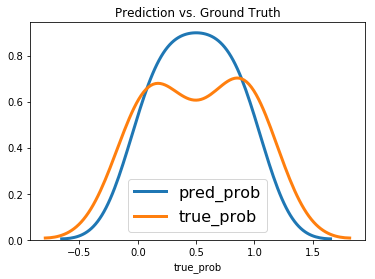

In [968]:
# Visualize the distribution
import seaborn as sns
# List the prediction and ground truth
lists = ['pred_prob', 'true_prob']

# Iterate through the five airlines
for item in lists: 
    # Draw the density plot
    sns.distplot(EvaResults[item], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = item)
    
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Prediction vs. Ground Truth')